In [54]:
import numpy as np
import csv

np.set_printoptions(precision=3, suppress=True, linewidth=100)

path = 'espresso.csv'
with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

print(headers)
print(data[0:3, :]) # first 3 rows


['beans', 'grind', 'dose', 'target_ratio', 'target_output', 'real_output', 'real_ratio', 'preinfusion', 'brew', 'total_time', 'ratio_diff', 'avg_flow_rate']
[[ 1.    15.    16.9    1.8   30.42  31.5    1.864 12.    27.    39.     0.036  1.167]
 [ 1.    15.    17.8    1.8   32.04  31.8    1.787 12.    36.    48.    -0.007  0.883]
 [ 1.    15.    17.4    1.8   31.32  33.2    1.908 10.    40.    50.     0.06   0.83 ]]


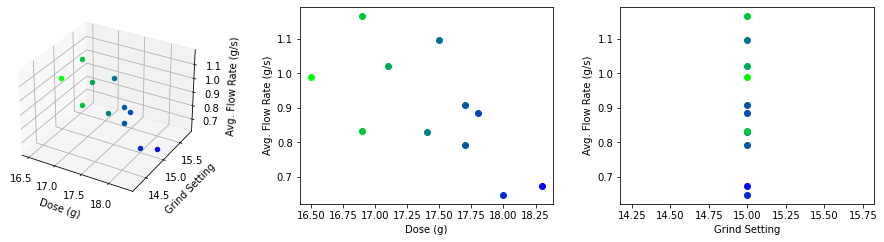

In [55]:
import matplotlib.pyplot as plt


def color_lerp(color0, color1, r, lb, ub):
    c0 = np.asarray(color0)
    c1 = np.asarray(color1)
    lb = lb - 0.001
    ub = ub + 0.001
    return tuple(c0 + (c1 - c0) * (r - lb) / (ub - lb))


color1 = (0, 1, 0)
color2 = (0, 0, 1)
maxes = np.amax(data, axis=0)
mins = np.amin(data, axis=0)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax0 = fig.add_subplot(1, 3, 1, projection='3d')
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)

for point in data:
    ax0.scatter(point[2], point[1], point[11], c=[color_lerp(
        color1, color2, point[2], mins[2], maxes[2])])
    ax1.scatter(point[2], point[11], c=[color_lerp(
        color1, color2, point[2], mins[2], maxes[2])])
    ax2.scatter(point[1], point[11], c=[color_lerp(
        color1, color2, point[2], mins[2], maxes[2])])

ax0.set_xlabel('Dose (g)')
ax0.set_ylabel('Grind Setting')
ax0.set_zlabel('Avg. Flow Rate (g/s)')

ax1.set_xlabel('Dose (g)')
ax1.set_ylabel('Avg. Flow Rate (g/s)')

ax2.set_xlabel('Grind Setting')
ax2.set_ylabel('Avg. Flow Rate (g/s)')

fig.tight_layout(pad=3.0)
plt.show()
